## Base de dados cats_dogs
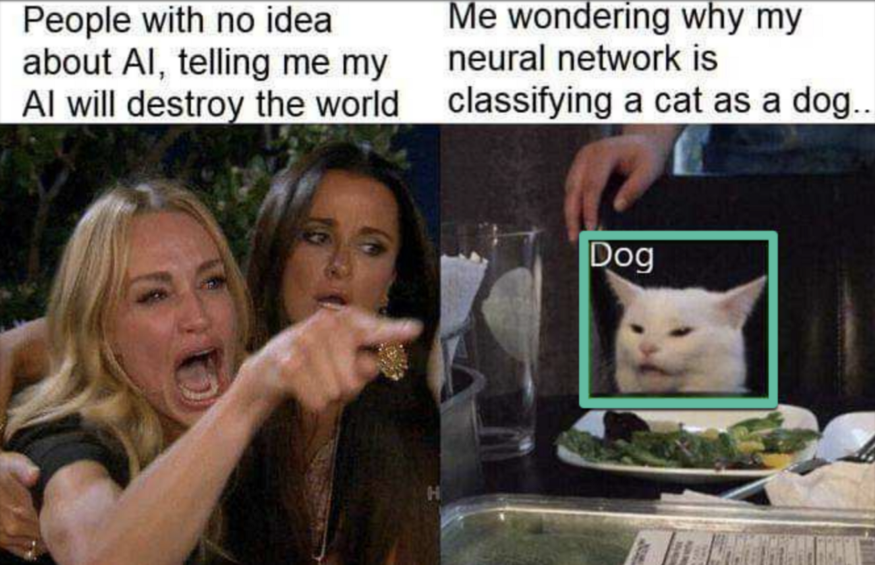

###### Importações

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [2]:
CNN = Sequential()

###### Etapa 1 - Convolution
Detector de Características e Mapa de Características

    Número de filtros (32)
    Dimensões do detector de características (3,3)
    Definição da altura/largura e canais RGB (64, 64, 3)
    Função de ativação para retirar os valores negativos da imagem - 'relu'
    Aceleração do processamento - BatchNormalization

In [3]:
CNN.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
CNN.add(BatchNormalization())

###### Etapa 2 - Max Pooling
Redução do tamanho da imagem focando nas caracteristicas mais importantes

    Definição da matriz com o total de 4 pixels (2, 2)

In [4]:
CNN.add(MaxPooling2D(pool_size = (2, 2)))

###### Camadas ocultas
    Definição das camadas ocultas

In [5]:
CNN.add(Conv2D(32, (3, 3), activation = 'relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size = (2, 2)))

###### Etapa 3 - Flattening
    
    Transformação da matriz para um vetor para entrar na camada da RN

In [6]:
CNN.add(Flatten())

###### Etapa 4 - Redes Neurais Densas

Parâmetros da rede neural artificial:

    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios que fazem parte da camada oculta - (128)
    activation - Função de ativação que será inserida - 'relu'
    Dropout - é usado para diminuir a chance de overfitting (20% dos neurônios de entrada são zerados)
    
Parâmetros do otimizador:

    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)
    metrics - Métrica de avaliação (obs - pode ser colocado mais de um)

In [7]:
# Camada de entrada
CNN.add(Dense(units = 128, activation = 'relu'))
CNN.add(Dropout(0.2))
# Camada oculta
CNN.add(Dense(units = 128, activation = 'relu'))
CNN.add(Dropout(0.2))
# Camada de saida (classificação binária - gato/cachorro)
CNN.add(Dense(units = 1, activation = 'sigmoid'))
# Compilação
CNN.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### Etapa 5 - Pré-processamento das imagens

Paramêtros Do ImageDataGenerator:

    rescale - Transforma o tamanho da imagem (normalização dos dados)
    rotation_range - grau da rotação da imagem
    horizontal_flip - Girar as imagens horizontalmente
    shear_range - Transformações geometricas aleatórias
    height_shift_range - Faixa da mudança da altura da imagem
    zoom_range - Imagens que serão aplicadas o zoom

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range =7, 
                                   horizontal_flip = True, 
                                   shear_range = 0.2,
                                   height_shift_range = 0.07,
                                   zoom_range = 0.2)
# Também deve ser feito para o dataset de teste
test_datagen = ImageDataGenerator(rescale = 1./255)

###### Etapa 6 - Diretório das imagens de treino e teste

Paramêtros do flow_from_directory:

    target_size - tamanho das imagens (lembrando que deve ser do mesmo tamanho da camada de entrada)
    batch_size - tamanho do batch
    class_mode -modo da classe (binário)

In [9]:
training_set = train_datagen.flow_from_directory('training_set', 
                                                 target_size= (64, 64), 
                                                 batch_size= 32, 
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory('test_set', 
                                            target_size= (64, 64), 
                                            batch_size= 32, 
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


###### Etapa 7 - Treino e Teste

Paramêtros do fit_generator

    train_data - base de dados de treinamento
    steps_per_epoch - número de imagens de treino (é recomendado ser dividido por 32, mas o tempo de treinamento será maior)
    epochs - número de épocas
    validation_data - base de dados de teste
    validation_steps - número de imagens para teste

In [11]:
CNN.fit_generator(training_set, steps_per_epoch= 4000 / 32, epochs = 5, validation_data= test_set, validation_steps= 2000 / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/125 [==============================] - ETA: 0s - loss: 0.8119 - accuracy: 0.5658WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000076E6B8CF78> and will run it as-is.
Please report this to the TensorFlow team. When filing 

###### Previsão com imagens individuais
    cachorro = 0 (números abaixo de 0.50 é considerado um cachorro)
    gato = 1 (números acima de 0.50 é considerado um gato)

In [12]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

Teste com cachorro

In [13]:
# Pré processamento da imagem
test_dog = image.load_img('test_set/dogs/dog.4364.jpg',
                           target_size = (64, 64))
test_dog = image.img_to_array(test_dog)
test_dog /= 255
test_dog = np.expand_dims(test_dog, axis = 0)

In [14]:
y_test = CNN.predict(test_dog)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [15]:
if y_test < 0.50:
    print(f'A imagem foi classificada com o valor de {y_test}, tendendo a ser um cachorro')
elif y_test >= 0.50:
    print(f'A imagem foi classificada com o valor de {y_test}, tendendo a ser um gato')

A imagem foi classificada com o valor de [[0.33317745]], tendendo a ser um cachorro


Teste com gato

In [37]:
# Pré processamento da imagem
test_cat = image.load_img('test_set/cats/cat.4076.jpg',
                           target_size = (64, 64))
test_cat = image.img_to_array(test_cat)
test_cat /= 255
test_cat = np.expand_dims(test_cat, axis = 0)

In [38]:
y_test = CNN.predict(test_cat)

In [39]:
if y_test < 0.50:
    print(f'A imagem foi classificada com o valor de {y_test}, tendendo a ser um cachorro')
elif y_test >= 0.50:
    print(f'A imagem foi classificada com o valor de {y_test}, tendendo a ser um gato')

A imagem foi classificada com o valor de [[0.5121785]], tendendo a ser um gato


Com isso, podemos concluir que a nossa rede neural convolucional obteve 68% de acertos e podemos dizer que a quantidade de acertos é razoável, lembrando que de 8000 imagens que seriam usadas para treino eu usei apenas 2000 imagens e coloquei apenas 5 epochs por conta do poder de processamento da minha máquina, caso eu usasse mais imagens a quantidade de acertos seria maior. 